In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
K = 1
sigma = 2

def Acos(R, theta, miu, nu):
    part1 = K/sigma*np.cos(miu*theta)*(R/sigma)**miu
    part2 = P(miu,nu,R**2/sigma**2)
    part3 = np.exp(-R**2/(4*sigma**2))
    return part1*part2*part3

def Asin(R, theta, miu, nu):
    part1 = K/sigma*np.sin(miu*theta)*(R/sigma)**miu
    part2 = P(miu,nu,R**2/sigma**2)
    part3 = np.exp(-R**2/(4*sigma**2))
    return part1*part2*part3

In [3]:
def P(miu,nu,u):
    returnarray = np.ones([360,91])
    for i in range(360):
        for j in range(91):
            terms = []
            p = 0
            while p <= nu:
                up = np.math.factorial(miu + nu)*np.math.factorial(nu)
                down = np.math.factorial(miu + p)*np.math.factorial(p)*np.math.factorial(nu-p)
                term = (-2)**(nu-p)* up/down * u[i][j]**p
                terms.append(term)
                p += 1
            returnarray[i][j] = np.sum(terms)
    return returnarray

In [4]:
theta = np.linspace(0, 10, 91)
phi = np.linspace(0, 2*np.pi+2*np.pi/360, 360)
xx, yy = np.meshgrid(theta, phi)

In [5]:
#ranks in linear form
zz00c = Acos(xx, yy, 0, 0)

zz10c = Acos(xx, yy, 1, 0)
zz10s = Asin(xx, yy, 1, 0)

zz20c = Acos(xx, yy, 2, 0)
zz01c = Acos(xx, yy, 0, 1)
zz20s = Asin(xx, yy, 2, 0)

zz30c = Acos(xx, yy, 3, 0)
zz11c = Acos(xx, yy, 1, 1)
zz11s = Asin(xx, yy, 1, 1)
zz30s = Asin(xx, yy, 3, 0)

In [6]:
#Model
total = 100 * zz00c + 20 * zz10c - zz10s - 2 * zz20c + 10 * zz01c + 40 * zz20s - 3 * zz30c + 0 * zz11c + 10 * zz11s - 2 * zz30s
model = total.flatten()

In [7]:
# Add noise
dt = 1
dnu = 1e6
sigma = np.absolute(model)/np.sqrt(dnu*dt)
data = np.random.normal(model, sigma) 
noise = data - model

<ipython-input-8-b17bb9ca7dea>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs.pcolormesh(yy,xx,total,cmap='coolwarm', label = "model")


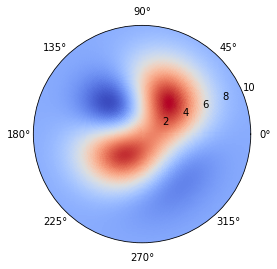

In [8]:
fig, axs = plt.subplots(1, 1, subplot_kw=dict(projection="polar"))
axs.pcolormesh(yy,xx,total,cmap='coolwarm', label = "model")

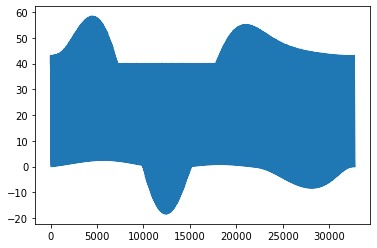

In [9]:
plt.plot(data)

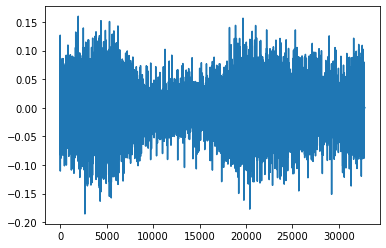

In [10]:
plt.plot(noise)

In [11]:
#matrix the data
mdata = np.matrix(data).T

In [12]:
#matrix the A
fzz00c = zz00c.flatten()

fzz10c = zz10c.flatten()
fzz10s = zz10s.flatten()

fzz20c = zz20c.flatten()
fzz01c = zz01c.flatten()
fzz20s = zz20s.flatten()

fzz30c = zz30c.flatten()
fzz11c = zz11c.flatten()
fzz11s = zz11s.flatten()
fzz30s = zz30s.flatten()
A = np.matrix([fzz00c,fzz10c,fzz10s,fzz20c,fzz01c,fzz20s,fzz30c,fzz11c,fzz11s,fzz30s]).T

In [13]:
AT = A.T
ATA = np.matmul(AT,A)
ATAinverse = np.linalg.inv(ATA)

In [14]:
half = np.matmul(ATAinverse,AT)
x = np.matmul(half,mdata)

In [15]:
x

matrix([[ 9.99989461e+01],
        [ 1.99985725e+01],
        [-1.00138564e+00],
        [-1.99982753e+00],
        [ 9.99894269e+00],
        [ 3.99997240e+01],
        [-2.99945682e+00],
        [-1.12999076e-03],
        [ 9.99895997e+00],
        [-2.00012697e+00]])

[100, 20, -1, -2, 10, 4, -3, 0, 10, -2]
<br>
[2, 3, -1, -2, 1, 4, -3, 0, 1, -2]
<br>
Comment: Pretty accurate

In [16]:
#calculating residual
fittingmodel = np.matmul(A, x)
r = fittingmodel - mdata
rT = r.T
rTr = np.matmul(rT,r)

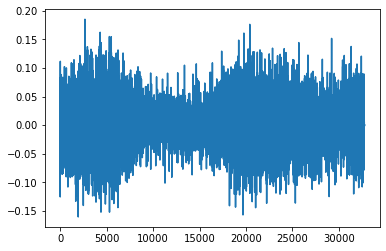

In [17]:
plt.plot(r)

In [18]:
s = rTr/((len(model))-10)
s2 = s.item(0)
covariance = s2*ATAinverse

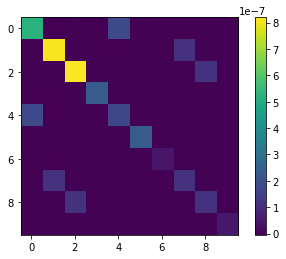

In [19]:
plt.imshow(covariance)
plt.colorbar()

In [20]:
zz10c[0]

array([0.        , 0.02775635, 0.05538435, 0.08275663, 0.1097478 ,
       0.13623538, 0.16210075, 0.18723001, 0.21151484, 0.23485327,
       0.25715035, 0.27831885, 0.29827977, 0.31696281, 0.33430679,
       0.35025989, 0.36477991, 0.37783434, 0.38940039, 0.39946491,
       0.40802426, 0.41508404, 0.42065878, 0.42477157, 0.42745359,
       0.4287436 , 0.42868738, 0.42733712, 0.42475077, 0.4209914 ,
       0.41612649, 0.41022722, 0.40336779, 0.39562474, 0.38707619,
       0.37780128, 0.36787944, 0.35738981, 0.34641067, 0.33501888,
       0.3232894 , 0.31129484, 0.29910505, 0.28678675, 0.27440327,
       0.26201423, 0.2496754 , 0.2374385 , 0.22535109, 0.21345652,
       0.20179392, 0.19039817, 0.17929999, 0.16852599, 0.15809884,
       0.14803735, 0.13835667, 0.12906849, 0.12018117, 0.11170003,
       0.10362754, 0.09596353, 0.08870545, 0.08184859, 0.0753863 ,
       0.06931025, 0.06361059, 0.05827624, 0.05329502, 0.04865389,
       0.04433912, 0.04033646, 0.03663128, 0.03320874, 0.03005